In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from lifelines import CoxPHFitter, KaplanMeierFitter

In [4]:
df = pd.read_csv('compas-scores-two-years.csv')


In [5]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [6]:
df[["sex", "race", "age", "dob", "age_cat", "decile_score", "two_year_recid"]][:10]


,sex,race,age,dob,age_cat,decile_score,two_year_recid
0,Male,Other,69,1947-04-18,Greater than 45,1,0
1,Male,African-American,34,1982-01-22,25 - 45,3,1
2,Male,African-American,24,1991-05-14,Less than 25,4,1
3,Male,African-American,23,1993-01-21,Less than 25,8,0
4,Male,Other,43,1973-01-22,25 - 45,1,0
5,Male,Other,44,1971-08-22,25 - 45,1,0
6,Male,Caucasian,41,1974-07-23,25 - 45,6,1
7,Male,Other,43,1973-02-25,25 - 45,4,0
8,Female,Caucasian,39,1976-06-03,25 - 45,1,0
9,Male,Caucasian,21,1994-06-10,Less than 25,3,1


Text(0.5, 1.0, 'Score Distribution by Race')

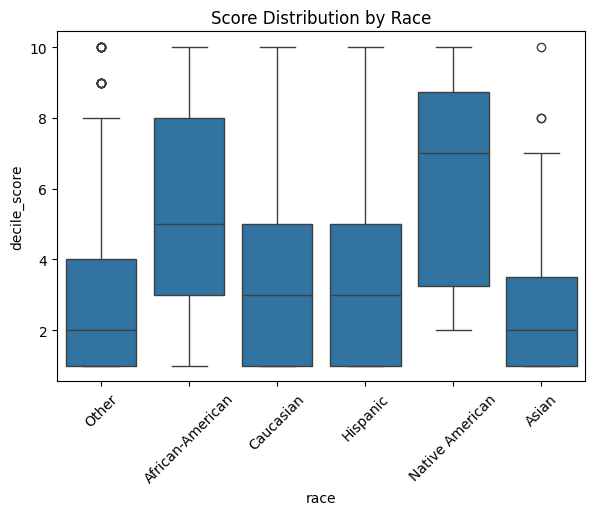

In [8]:
plt.figure(figsize=(15,10))

# Distrubution by race
plt.subplot(2, 2, 1)
sns.boxplot(x='race', y='decile_score', data=df)
plt.xticks(rotation=45)
plt.title('Score Distribution by Race')


Text(0.5, 1.0, 'Score Distribution by Sex')

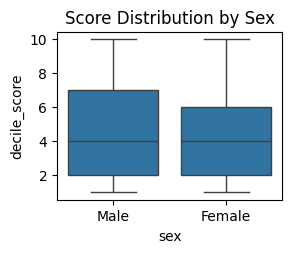

In [9]:
# Distribution by Sex
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='decile_score', data=df)
plt.title('Score Distribution by Sex')


Text(0.5, 1.0, 'Score Distribution by Age Category')

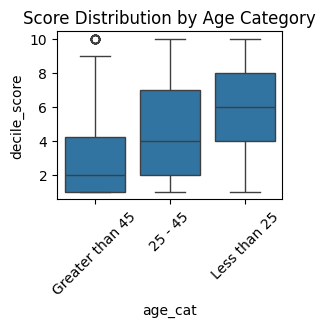

In [10]:
# Distribution by Age Category
plt.subplot(2, 2, 3)
sns.boxplot(x='age_cat', y='decile_score', data=df)
plt.xticks(rotation=45)
plt.title('Score Distribution by Age Category')


Text(0.5, 1.0, 'Overall Score Distribution')

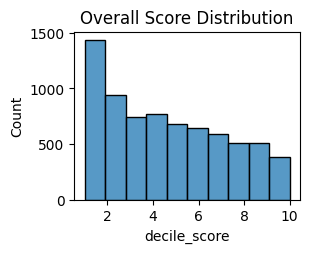

In [11]:
#Score Distribution Overall
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='decile_score', bins=10)
plt.title('Overall Score Distribution')

In [12]:
print("\nMean Scores by Race:")
print(df.groupby('race')['decile_score'].mean())

print("\nMean Scores by Sex:")
print(df.groupby('sex')['decile_score'].mean())

print("\nMean Scores by Age Category:")
print(df.groupby('age_cat')['decile_score'].mean())


Mean Scores by Race:
race
African-American    5.368777
Asian               2.937500
Caucasian           3.735126
Hispanic            3.463108
Native American     6.166667
Other               2.949602
Name: decile_score, dtype: float64

Mean Scores by Sex:
sex
Female    4.172043
Male      4.590479
Name: decile_score, dtype: float64

Mean Scores by Age Category:
age_cat
25 - 45            4.599659
Greater than 45    2.917513
Less than 25       5.908437
Name: decile_score, dtype: float64


In [14]:
sns.set(style='whitegrid')
print('Dataset Overview:')
print(f"Total Defendants: {len(df)}")

Dataset Overview:
Total Defendants: 7214


Demographics:
Race Distribution:
  African-American: 3696 (51.2%)
  Caucasian: 2454 (34.0%)
  Hispanic: 637 (8.8%)
  Other: 377 (5.2%)
  Asian: 32 (0.4%)
  Native American: 18 (0.2%)


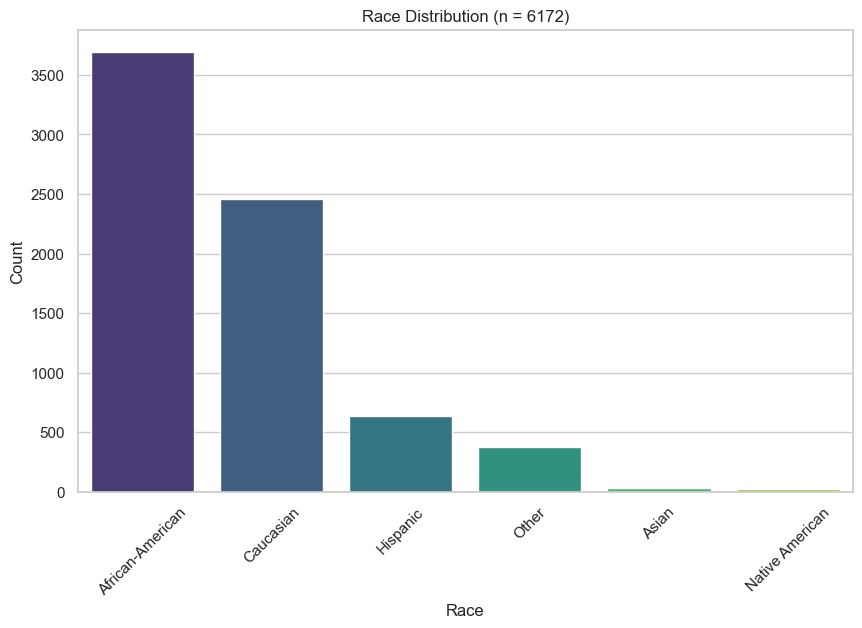

In [15]:
# 2. Demographics
print("Demographics:")
# Race
race_counts = df['race'].value_counts()
race_percents = df['race'].value_counts(normalize=True) * 100
print("Race Distribution:")
for race, count, percent in zip(race_counts.index, race_counts, race_percents):
    print(f"  {race}: {count} ({percent:.1f}%)")
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, hue=race_counts.index, palette="viridis", legend=False)
plt.title('Race Distribution (n = 6172)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sex Distribution:
  Male: 5819 (80.7%)
  Female: 1395 (19.3%)


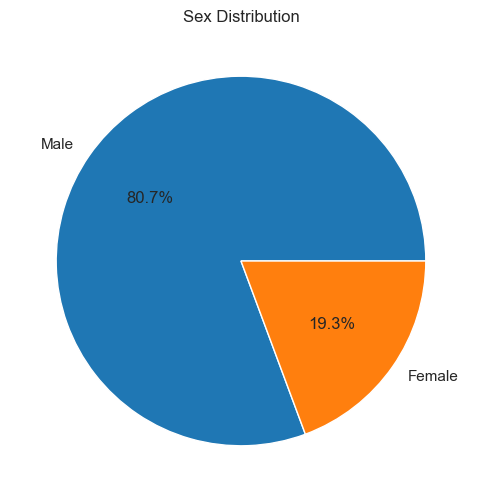

In [16]:
sex_counts = df['sex'].value_counts()
sex_percents = df['sex'].value_counts(normalize=True) * 100
print("Sex Distribution:")
for sex, count, percent in zip(sex_counts.index, sex_counts, sex_percents):
    print(f"  {sex}: {count} ({percent:.1f}%)")
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Sex Distribution')
plt.show()

Mean Age: 34.8 years
Median Age: 31 years
Age Category Distribution:
  25 - 45: 4109 (57.0%)
  Greater than 45: 1576 (21.8%)
  Less than 25: 1529 (21.2%)


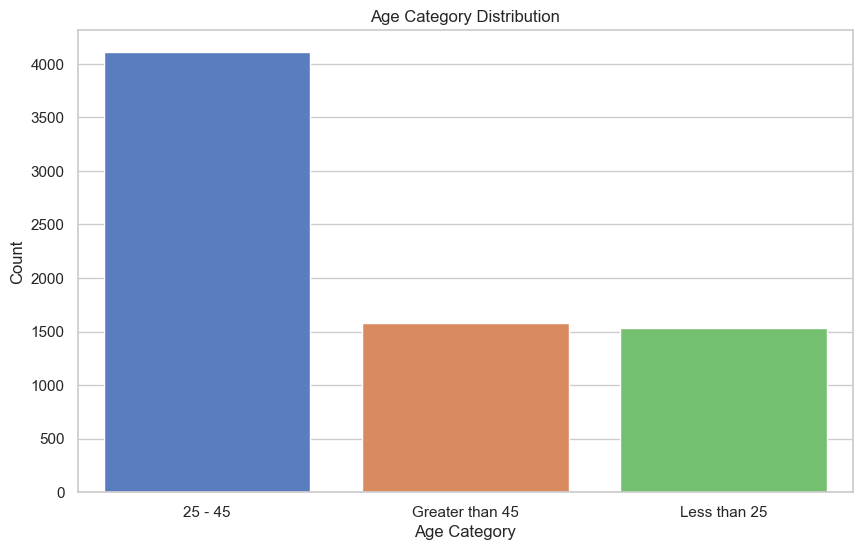

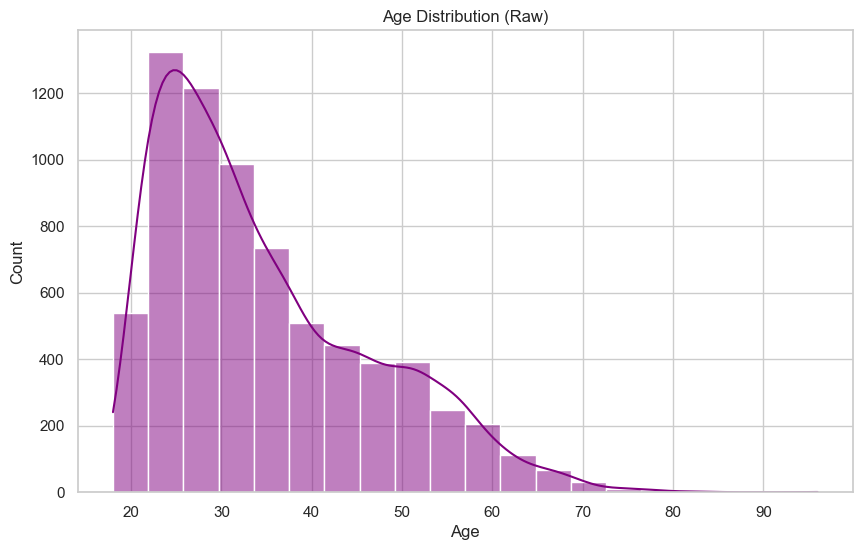

In [17]:
# Age
print(f"Mean Age: {df['age'].mean():.1f} years")
print(f"Median Age: {df['age'].median():.0f} years")
age_cat_counts = df['age_cat'].value_counts()
print("Age Category Distribution:")
for cat, count in age_cat_counts.items():
    print(f"  {cat}: {count} ({count / len(df) * 100:.1f}%)")
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cat_counts.index, y=age_cat_counts.values, hue=age_cat_counts.index, palette="muted", legend=False)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution (Raw)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Criminal History:
Mean Prior Offenses (Adult): 3.5
Median Prior Offenses (Adult): 2
Range of Prior Offenses: 0 - 38


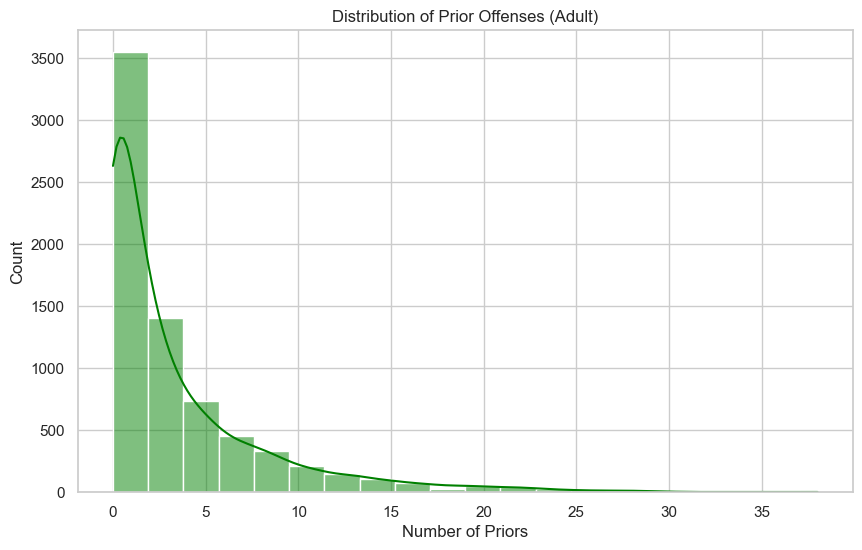

In [18]:
# 3. Criminal History
print("Criminal History:")
print(f"Mean Prior Offenses (Adult): {df['priors_count'].mean():.1f}")
print(f"Median Prior Offenses (Adult): {df['priors_count'].median():.0f}")
print(f"Range of Prior Offenses: {df['priors_count'].min()} - {df['priors_count'].max()}")
plt.figure(figsize=(10, 6))
sns.histplot(df['priors_count'], bins=20, kde=True, color='green')
plt.title('Distribution of Prior Offenses (Adult)')
plt.xlabel('Number of Priors')
plt.ylabel('Count')
plt.show()

Mean Juvenile Felonies: 0.07
Mean Juvenile Misdemeanors: 0.09
Mean Other Juvenile Offenses: 0.11


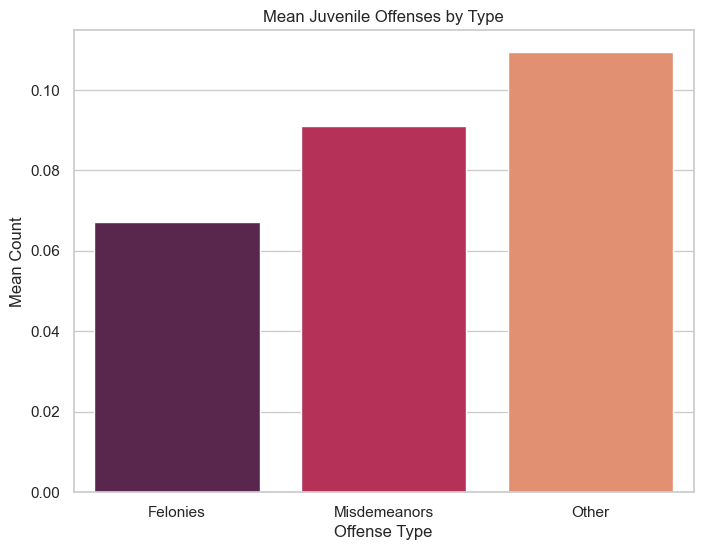

In [19]:
print(f"Mean Juvenile Felonies: {df['juv_fel_count'].mean():.2f}")
print(f"Mean Juvenile Misdemeanors: {df['juv_misd_count'].mean():.2f}")
print(f"Mean Other Juvenile Offenses: {df['juv_other_count'].mean():.2f}")
juv_means = [df['juv_fel_count'].mean(), df['juv_misd_count'].mean(), df['juv_other_count'].mean()]
juv_labels = ['Felonies', 'Misdemeanors', 'Other']
plt.figure(figsize=(8, 6))
sns.barplot(x=juv_labels, y=juv_means, hue=juv_labels, palette="rocket", legend=False)
plt.title('Mean Juvenile Offenses by Type')
plt.xlabel('Offense Type')
plt.ylabel('Mean Count')
plt.show()

Current Charge Degree:
  F: 4666 (64.7%)
  M: 2548 (35.3%)


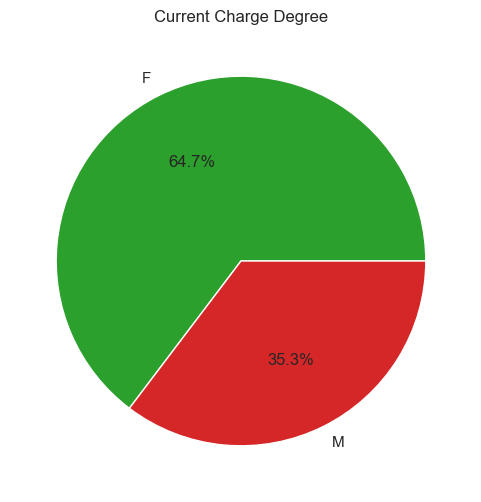

In [20]:
# 4. Current Charge
charge_counts = df['c_charge_degree'].value_counts()
print("Current Charge Degree:")
for degree, count in charge_counts.items():
    print(f"  {degree}: {count} ({count / len(df) * 100:.1f}%)")
plt.figure(figsize=(6, 6))
plt.pie(charge_counts, labels=charge_counts.index, autopct='%1.1f%%', colors=['#2ca02c', '#d62728'])
plt.title('Current Charge Degree')
plt.show()

Recidivism Outcomes:
Overall Two-Year Recidivism Rate: 45.1%
Two-Year Recidivism Rate by Race:
  African-American: 51.4%
  Asian: 28.1%
  Caucasian: 39.4%
  Hispanic: 36.4%
  Native American: 55.6%
  Other: 35.3%


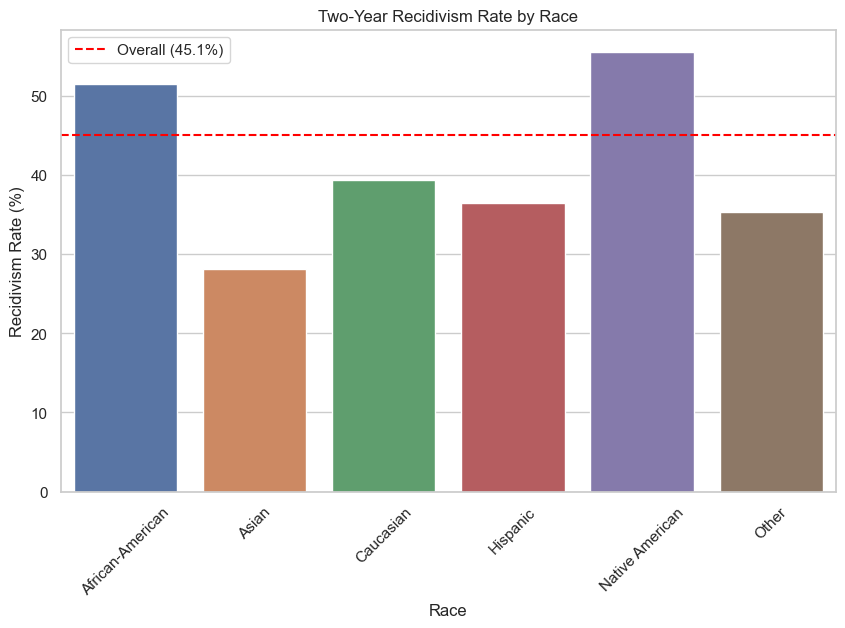

In [21]:
# 5. Recidivism Outcomes
print("Recidivism Outcomes:")
overall_recid_rate = df['two_year_recid'].mean() * 100
print(f"Overall Two-Year Recidivism Rate: {overall_recid_rate:.1f}%")
recid_by_race = df.groupby('race')['two_year_recid'].mean() * 100
print("Two-Year Recidivism Rate by Race:")
for race, rate in recid_by_race.items():
    print(f"  {race}: {rate:.1f}%")
plt.figure(figsize=(10, 6))
sns.barplot(x=recid_by_race.index, y=recid_by_race.values, hue=recid_by_race.index, palette="deep", legend=False)
plt.axhline(y=overall_recid_rate, color='red', linestyle='--', label=f'Overall ({overall_recid_rate:.1f}%)')
plt.title('Two-Year Recidivism Rate by Race')
plt.xlabel('Race')
plt.ylabel('Recidivism Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Mean Decile Score (General): 4.5
Median Decile Score (General): 4
Mean Decile Score by Race:
  African-American: 5.4
  Asian: 2.9
  Caucasian: 3.7
  Hispanic: 3.5
  Native American: 6.2
  Other: 2.9


/var/folders/y_/z30sh81d7sg8pkp71bmjxf0h0000gn/T/ipykernel_94662/2508997477.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race', y='decile_score', data=df, palette="coolwarm")


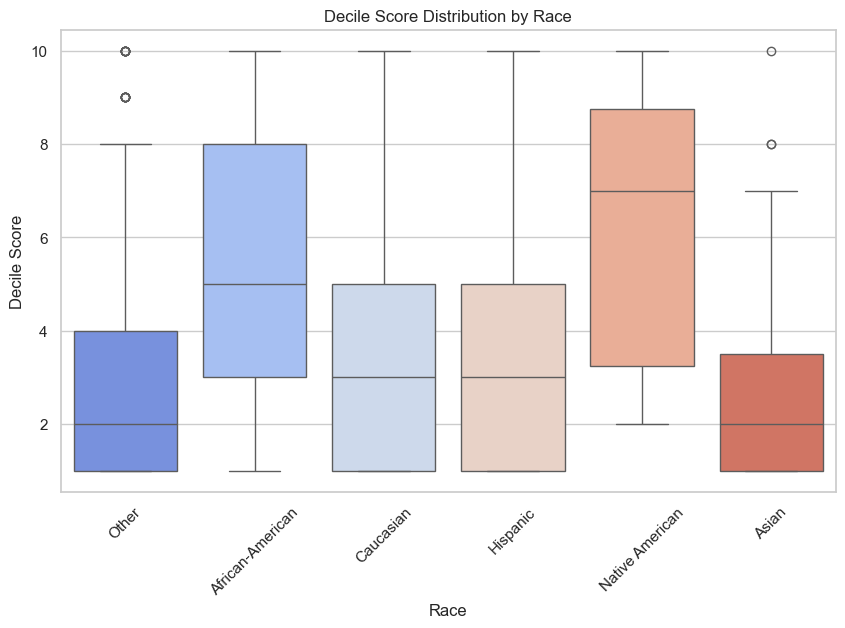

In [22]:

print(f"Mean Decile Score (General): {df['decile_score'].mean():.1f}")
print(f"Median Decile Score (General): {df['decile_score'].median():.0f}")
decile_by_race = df.groupby('race')['decile_score'].mean()
print("Mean Decile Score by Race:")
for race, score in decile_by_race.items():
    print(f"  {race}: {score:.1f}")
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='decile_score', data=df, palette="coolwarm")
plt.title('Decile Score Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Decile Score')
plt.xticks(rotation=45)
plt.show()

Violent Recidivism Outcomes:
Overall Violent Recidivism Rate: 11.4%
Mean Violent Decile Score: 3.7


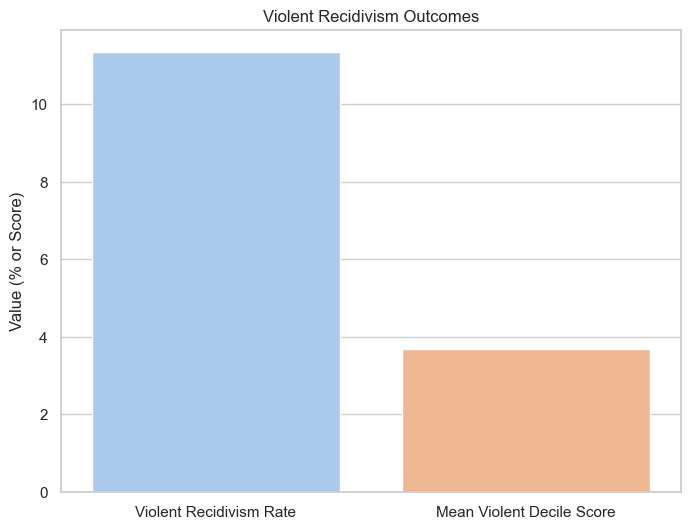

In [23]:
# 6. Violent Recidivism
violent_recid_rate = df['is_violent_recid'].mean() * 100
print("Violent Recidivism Outcomes:")
print(f"Overall Violent Recidivism Rate: {violent_recid_rate:.1f}%")
print(f"Mean Violent Decile Score: {df['v_decile_score'].mean():.1f}")
plt.figure(figsize=(8, 6))
sns.barplot(x=['Violent Recidivism Rate', 'Mean Violent Decile Score'], 
            y=[violent_recid_rate, df['v_decile_score'].mean()], 
            hue=['Violent Recidivism Rate', 'Mean Violent Decile Score'], 
            palette="pastel", legend=False)
plt.title('Violent Recidivism Outcomes')
plt.ylabel('Value (% or Score)')
plt.show()

In [25]:
# True labels and predicted scores
from sklearn.metrics import accuracy_score, confusion_matrix
y_true = df['two_year_recid']
y_pred_decile = df['decile_score']  # Continuous score (1-10)
# Convert decile_score to binary prediction (threshold = 5, "Medium" or higher = 1)
y_pred_binary = (df['decile_score'] >= 5).astype(int)
accuracy = accuracy_score(y_true, y_pred_binary)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.654


TP: 2035, FP: 1282, TN: 2681, FN: 1216


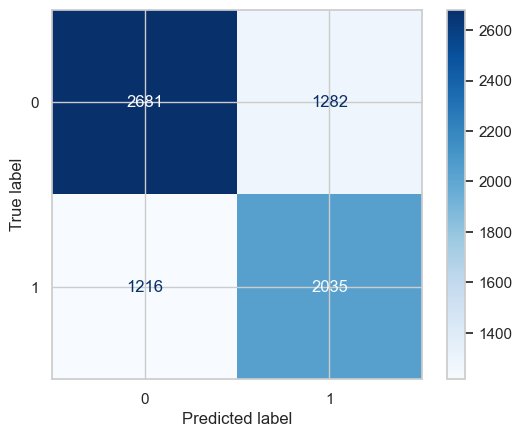

In [26]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
# lets plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

ROC-AUC: 0.702


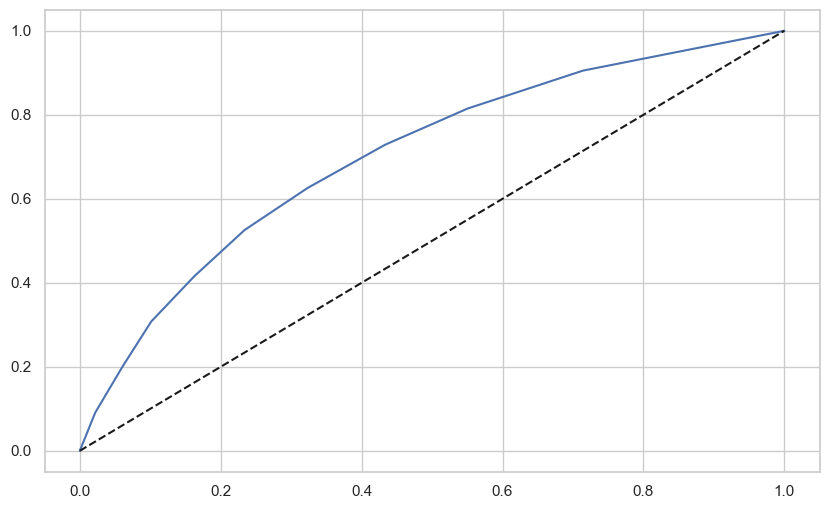

In [27]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_pred_decile)
print(f"ROC-AUC: {auc:.3f}")
# lets plot the roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_decile)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
